# Gather

In [17]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

In [18]:
# Twitter enhanced archive. Local file
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [19]:
# Image prediction data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
        file.write(response.content)
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [20]:
# Retweet and favorites data - API Set up
consumer_key = '3tHsLVFn2pxC31J4YdOsbJYIa'
consumer_secret = '9tGEGKpDypNqNeN1Y7n01FmrzzLo1JJW96fzYRyBrSHF8cQriD'
access_token = '1028145944393474048-HRuCROZztjPA6jPPiuygo5SVZPtvtm'
access_secret = 'K3auIZBeFdRCCHJiYVvNQF07rBv9vuVxrhSR9rvbhXc4f'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
# Now get tweet data for every tweet in dog archive, writing each to txt file
outfile = open('tweet_json.txt', 'w')
for tweet_id in twitter_archive_df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        tweet_json = tweet._json
        json.dump(tweet_json, outfile)
        outfile.write('\n')
    except:
        continue
outfile.close()

Rate limit reached. Sleeping for: 777
Rate limit reached. Sleeping for: 780


In [21]:
# Read JSON data line by line, forming a list of dictionaries
df_list = []

with open('tweet_json.txt') as infile:
    for line in infile:
        df_list.append(json.loads(line))

tweet_data_extra_df = pd.DataFrame(df_list, columns = df_list[0].keys())

# Assess

## Visual

In [22]:
# Twitter enhanced arhive
twitter_archive_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1934,674014384960745472,NaN,NaN,2015-12-07 23:55:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Aiden. His eyes are magical. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674014384...,11,10,Aiden,None,None,None,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
84,876484053909872640,NaN,NaN,2017-06-18 16:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/876484053...,13,10,Benedict,None,None,None,None
226,848690551926992896,NaN,NaN,2017-04-03 00:16:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in animals other than dogs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848690551...,12,10,None,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
273,840728873075638272,NaN,NaN,2017-03-12 00:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Pipsy. He is a fluffbal...,6.671522e+17,4.196984e+09,2015-11-19 01:27:25 +0000,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
1686,681610798867845120,NaN,NaN,2015-12-28 23:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*collapses* 12/10 https://t.co/C7M8mnzHIK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681610798...,12,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,None,None,None,None


In [23]:
# Image prediction data
image_predictions_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
1069,716080869887381504,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,1,golden_retriever,0.638625,True,chow,0.254717,True,Tibetan_mastiff,0.071732,True
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,0.067868,True
1439,774639387460112384,https://pbs.twimg.com/media/CsASZqRW8AA3Szw.jpg,1,Walker_hound,0.627593,True,basenji,0.128705,True,Ibizan_hound,0.126282,True
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West_Highland_white_terrier,0.946828,True,miniature_schnauzer,0.022344,True,cairn,0.009462,True
185,669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,Labrador_retriever,0.367818,True,German_short-haired_pointer,0.280642,True,Chesapeake_Bay_retriever,0.184246,True
1554,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,Lakeland_terrier,0.266824,True,Irish_terrier,0.218783,True,Airedale,0.132960,True
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
# Additional tweet data from Twitter API
tweet_data_extra_df.sample(15)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
2312,Tue Nov 17 00:24:19 +0000 2015,666411507551481857,666411507551481857,This is quite the dog. Gets really excited whe...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666411498068123649, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,325,445,False,False,False,False,en
297,Mon Feb 27 17:01:56 +0000 2017,836260088725786625,836260088725786625,This is Lucy. She spent all morning overseeing...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 836260074393747456, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4682,22592,False,False,False,False,en
47,Thu Jul 06 15:58:11 +0000 2017,882992080364220416,882992080364220416,This is Rusty. He wasn't ready for the first p...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 882992072327913472, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3906,23804,False,False,False,False,en
704,Thu Oct 06 15:49:14 +0000 2016,784057939640352768,784057939640352768,This is Balto. He's very content. Legendary to...,False,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,None,None,False,12443,32414,False,False,False,False,en
1224,Tue Mar 22 02:03:52 +0000 2016,712097430750289920,712097430750289920,I can't even comprehend how confused this dog ...,False,"[0, 94]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 712097427059306497, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1117,4020,False,False,False,False,en
229,Fri Mar 31 01:11:22 +0000 2017,847617282490613760,847617282490613760,.@breaannanicolee PUPDATE: Cannon has a heart ...,False,"[18, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",8.476062e+17,...,None,None,False,452,7352,False,False,NaN,NaN,en
106,Sun Jun 04 23:56:03 +0000 2017,871515927908634625,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 871515922741284865, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3481,20203,False,False,False,False,en
2164,Tue Nov 24 04:52:37 +0000 2015,669015743032369152,669015743032369152,Super rare dog right here guys. Doesn't bark. ...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669015737663684612, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,388,759,False,False,False,False,en
1860,Fri Dec 11 02:08:58 +0000 2015,675135153782571009,675135153782571009,This is Steven. He got locked outside. Damn it...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675135144945131520, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,526,1350,False,False,False,False,en
1386,Tue Feb 16 04:15:05 +0000 2016,699446877801091073,699446877801091073,This is Archie. He's undercover in all these p...,False,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 699446858545020928, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,2835,6306,False,False,False,False,en


## Programmatic

In [25]:
# Twitter enhanced arhive
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [27]:
# How can the denominator be more than 10?
twitter_archive_df.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [28]:
# Image prediction data
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# How can there be 100% confidence?
image_predictions_df.query("p1_conf == 1.0")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [23]:
image_predictions_df.shape

(2075, 12)

In [30]:
# Additional tweet data from Twitter API
tweet_data_extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 27 columns):
created_at                       2342 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
full_text                        2342 non-null object
truncated                        2342 non-null bool
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2067 non-null object
source                           2342 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2342 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [31]:
tweet_data_extra_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count
count,2.342000e+03,7.800000e+01,7.800000e+01,2342.000000,2342.000000
mean,7.422646e+17,7.455079e+17,2.014171e+16,2981.989752,8040.369769
std,6.837466e+16,7.582492e+16,1.252797e+17,4964.054250,12272.430398
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000
25%,6.783509e+17,6.757419e+17,3.086374e+08,600.000000,1395.250000
50%,7.186224e+17,7.038708e+17,4.196984e+09,1396.000000,3513.500000
75%,7.987010e+17,8.257804e+17,4.196984e+09,3480.500000,9890.750000
max,8.924206e+17,8.862664e+17,8.405479e+17,79735.000000,142522.000000


In [32]:
# Why are these all false even though we clearly have favorited and retweeted counts?
print(tweet_data_extra_df.favorited.value_counts())
print(tweet_data_extra_df.retweeted.value_counts())

False    2342
Name: favorited, dtype: int64
False    2342
Name: retweeted, dtype: int64


# Clean

In [33]:
# First copy all dataframes
twitter_archive_df_copy = twitter_archive_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
tweet_data_extra_df_copy = tweet_data_extra_df.copy()

### Quality

##### Define
Remove all retweets and replies from both `twitter-archive-enhanced` and `tweet_data_extra` tables.

##### Code

In [34]:
# Twitter archive enhanced table
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.in_reply_to_status_id.isnull()]
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.in_reply_to_user_id.isnull()]
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.retweeted_status_id.isnull()]
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.retweeted_status_user_id.isnull()]

In [35]:
# Tweet data extra table
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.in_reply_to_status_id.isnull()]
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.in_reply_to_user_id.isnull()]
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.in_reply_to_screen_name.isnull()]

##### Test

In [36]:
twitter_archive_df_copy.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [37]:
twitter_archive_df_copy.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [38]:
twitter_archive_df_copy.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [39]:
twitter_archive_df_copy.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [40]:
tweet_data_extra_df_copy.in_reply_to_status_id.value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

In [41]:
tweet_data_extra_df_copy.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

In [42]:
tweet_data_extra_df_copy.in_reply_to_screen_name.value_counts()

Series([], Name: in_reply_to_screen_name, dtype: int64)

##### Define
Fix "retweeted" and "favorited" columns in `tweet_data_extra` table to say True when they are retweeted or favorited.

##### Code

In [43]:
# Mapping functions
def fix_favorites(row):
    if row.favorite_count > 0:
        return True
    else:
        return False
    
def fix_retweets(row):
    if row.retweet_count > 0:
        return True
    else:
        return False

In [44]:
# Apply
tweet_data_extra_df_copy.favorited = tweet_data_extra_df_copy.apply(fix_favorites, axis=1)
tweet_data_extra_df_copy.retweeted = tweet_data_extra_df_copy.apply(fix_retweets, axis=1)

##### Test

In [45]:
tweet_data_extra_df_copy.favorited .value_counts()

True     2096
False     168
Name: favorited, dtype: int64

In [46]:
tweet_data_extra_df_copy.retweeted .value_counts()

True    2264
Name: retweeted, dtype: int64

In [47]:
tweet_data_extra_df_copy.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
1189,Sat Apr 02 15:25:47 +0000 2016,716285507865542656,716285507865542656,This is Stephanus. She stays woke. 12/10 https...,False,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 716285498407456768, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1174,2938,True,True,False,False,en
303,Sat Feb 25 01:18:40 +0000 2017,835297930240217089,835297930240217089,Meet Ash. He's a Benebop Cumberplop. Quite rar...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 835297922317070336, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,3269,17425,True,True,False,False,en
1244,Thu Mar 17 01:55:02 +0000 2016,710283270106132480,710283270106132480,This is Gunner. He's a Figamus Newton. King of...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 710283263395246080, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,559,2254,True,True,False,False,en
2005,Wed Dec 02 18:48:47 +0000 2015,672125275208069120,672125275208069120,This is just impressive I have nothing else to...,False,"[0, 81]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672125270745333761, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1198,2478,True,True,False,False,en
2038,Tue Dec 01 00:30:04 +0000 2015,671486386088865792,671486386088865792,This is Malcolm. He just saw a spider. 10/10 h...,False,"[0, 68]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671486378568364032, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,214,601,True,True,False,False,en


In [48]:
tweet_data_extra_df_copy.query("favorited == False")

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,True,104,0,False,True,False,False,und
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,18532,0,False,True,False,False,en
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6833,0,False,True,NaN,NaN,en
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1292,0,False,True,NaN,NaN,en
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6649,0,False,True,NaN,NaN,en
77,Wed Jun 21 19:36:23 +0000 2017,877611172832227328,877611172832227328,RT @rachel2195: @dog_rates the boyfriend and h...,False,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,81,0,False,True,False,False,en
90,Tue Jun 13 01:14:41 +0000 2017,874434818259525634,874434818259525634,RT @dog_rates: This is Coco. At first I though...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,14805,0,False,True,NaN,NaN,en
95,Sat Jun 10 00:35:19 +0000 2017,873337748698140672,873337748698140672,RT @dog_rates: This is Sierra. She's one preci...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,1594,0,False,True,NaN,NaN,en
99,Thu Jun 08 04:17:07 +0000 2017,872668790621863937,872668790621863937,RT @loganamnosis: Penelope here is doing me qu...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,28,0,False,True,NaN,NaN,en
107,Sun Jun 04 00:46:17 +0000 2017,871166179821445120,871166179821445120,RT @dog_rates: This is Dawn. She's just checki...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,5752,0,False,True,NaN,NaN,en


##### Define
In the `twitter-archive-enhanced` table, for dogs whose names were incorrectly extracted from sentences, replace these names with "None". It is better to have None than an inaccurate name.

##### Code

In [49]:
# Double check that names that start with a lowercase letter are incorrecly extracted names from sentences
twitter_archive_df_copy[twitter_archive_df_copy.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None


In [50]:
# Mapping function
def fix_dog_names(row):
    if row["name"][0].islower():
        return "None"
    else:
        return row["name"]

In [51]:
# Apply
twitter_archive_df_copy.name = twitter_archive_df_copy.apply(fix_dog_names, axis=1)

##### Test

In [52]:
twitter_archive_df_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
1553,688908934925697024,NaN,NaN,2016-01-18 02:21:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Clarence. He does parkour. 8/10 very tale...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688908934...,8,10,Clarence,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
2011,672245253877968896,NaN,NaN,2015-12-03 02:45:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snickers. He's adorable. Also comes in t-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672245253...,12,10,Snickers,None,None,None,None
1311,707021089608753152,NaN,NaN,2016-03-08 01:52:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707021089...,12,10,Tucker,None,None,None,None
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None
942,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,11,10,Grizzie,None,None,None,None
336,832636094638288896,NaN,NaN,2017-02-17 17:01:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Orion. He just got back from the denti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832636094...,12,10,Orion,None,None,None,None
934,753420520834629632,NaN,NaN,2016-07-14 02:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753420520...,11,10,None,None,None,None,None


In [53]:
# No more entries where the name is lower case
twitter_archive_df_copy[twitter_archive_df_copy.name.str[0].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define
For every denominator that is a multiple of 10, it just means that there are multiple dogs in the picture, so let's normalize each of those ratings as if it was one dog being rated.

##### Code

In [54]:
# Map function
def fix_multiple_dogs_numerator(row):
    # if denominator is a higher multiple of 10
    if (row["rating_denominator"] > 10 and row["rating_denominator"] % 10 == 0):
        multiple = row["rating_denominator"] / 10
        return int(round(row["rating_numerator"] / multiple))
    else:
        return row["rating_numerator"]

In [55]:
# Apply
twitter_archive_df_copy["rating_numerator"] = twitter_archive_df_copy.apply(fix_multiple_dogs_numerator, axis=1)

##### Test

In [56]:
twitter_archive_df.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [57]:
twitter_archive_df_copy.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,12,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,11,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,12,170,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,2,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,10,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,11,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,10,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,9,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,12,50,None,None,None,None,None


##### Define
Now that those numerators are fixed, let's fix those same denominators by normalizing them, too.

##### Code

In [58]:
# Map function
def fix_multiple_dogs_denominator(row):
    # if denominator is a higher multiple of 10
    if (row["rating_denominator"] > 10 and row["rating_denominator"] % 10 == 0):
        return 10
    else:
        return row["rating_denominator"]

In [59]:
# Apply
twitter_archive_df_copy["rating_denominator"] = twitter_archive_df_copy.apply(fix_multiple_dogs_denominator, axis=1)

##### Test

In [60]:
twitter_archive_df_copy.query("rating_denominator > 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


##### Define
Let's fix the two broken ratings displayed in the test above. I simply visited the webpages of the two tweets and found their true ratings, which were incorrectly extracted.

##### Code

In [61]:
twitter_archive_df_copy.at[1068, 'rating_numerator'] = 14
twitter_archive_df_copy.at[1068, 'rating_denominator'] = 10

twitter_archive_df_copy.at[1662, 'rating_numerator'] = 10
twitter_archive_df_copy.at[1662, 'rating_denominator'] = 10

##### Test

In [62]:
twitter_archive_df_copy.loc[[1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


In [63]:
twitter_archive_df_copy.loc[[1662]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None


##### Define
Remove the tweet from all three tables where the image prediction has a confidence of 100%. This is simply unfeasible; the prediction isn't even a dog.

##### Code

In [64]:
image_predictions_df_copy.query("p1_conf == 1.0")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [65]:
image_predictions_df_copy = image_predictions_df_copy[image_predictions_df_copy.tweet_id != 667866724293877760]

In [66]:
twitter_archive_df_copy = twitter_archive_df_copy[twitter_archive_df_copy.tweet_id != 667866724293877760]

In [67]:
tweet_data_extra_df_copy = tweet_data_extra_df_copy[tweet_data_extra_df_copy.id != 667866724293877760]

##### Test

In [68]:
image_predictions_df_copy.query("p1_conf == 1.0")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [69]:
twitter_archive_df_copy.query("tweet_id == 667866724293877760")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [70]:
tweet_data_extra_df_copy.query("id == 667866724293877760")

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang


##### Define
In the `twitter-archive-enhanced` table, change the data type of the timestamp variable to be a datetime object, as opposed to a string.

##### Code

In [71]:
# Mapping function
def fix_timestamps(row):
    return row["timestamp"][:-15]

In [72]:
# Apply
twitter_archive_df_copy["timestamp"] = twitter_archive_df_copy.apply(fix_timestamps, axis=1)

# To datetime
twitter_archive_df_copy.timestamp = pd.to_datetime(twitter_archive_df_copy.timestamp)

##### Test

In [75]:
# Check dtype
twitter_archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2096 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source                        2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null int64
rating_denominator            2096 non-null int64
name                          2096 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
dtypes: datetime64[ns](1), float

In [76]:
# Check some values
twitter_archive_df_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2087,670797304698376195,NaN,NaN,2015-11-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Trigger. He was minding his own busine...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670797304...,11,10,Trigger,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,None,None,None,None,None
1148,726887082820554753,NaN,NaN,2016-05-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Blitz. He's a new dad struggling to co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726887082...,10,10,Blitz,None,None,None,None
1107,734776360183431168,NaN,NaN,2016-05-23,"<a href=""http://twitter.com/download/iphone"" r...",This is Livvie. Someone should tell her it's b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/734776360...,11,10,Livvie,None,None,None,None
746,780074436359819264,NaN,NaN,2016-09-25,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo questioning his entire existenc...,NaN,NaN,NaN,https://vine.co/v/5nzYBpl0TY2,10,10,None,doggo,None,None,None
2073,670995969505435648,NaN,NaN,2015-11-29,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle this job anymore your dogs ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670995969...,12,10,None,None,None,None,None
163,860276583193509888,NaN,NaN,2017-05-04,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
1968,673320132811366400,NaN,NaN,2015-12-06,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
2279,667405339315146752,NaN,NaN,2015-11-19,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,None,None,None
1808,676897532954456065,NaN,NaN,2015-12-15,"<a href=""http://twitter.com/download/iphone"" r...",Exotic handheld dog here. Appears unathletic. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676897532...,5,10,None,None,None,None,None


### Tidiness

##### Define
Turn the three dog stage columns into just one column. As explained in the report, melting is a hassle here so I will simply add a column.

In [77]:
# Map function
def fix_dog_stages(row):
    if (row["doggo"] != 'None'):
        return "doggo"
    elif (row["floofer"] != 'None'):
        return "floofer"
    elif (row["pupper"] != 'None'):
        return "pupper"
    elif (row["puppo"] != 'None'):
        return "puppo"
    else:
         return 'None'

In [78]:
# Apply
twitter_archive_df_copy["dog_stage"] = twitter_archive_df_copy.apply(fix_dog_stages, axis=1)

##### Test

In [79]:
twitter_archive_df_copy.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
781,775729183532220416,NaN,NaN,2016-09-13,"<a href=""http://twitter.com/download/iphone"" r...",This girl straight up rejected a guy because h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775729183...,13,10,None,None,None,None,None,None
1545,689289219123089408,NaN,NaN,2016-01-19,"<a href=""http://twitter.com/download/iphone"" r...",Someone sent me this without any context and e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689289219...,13,10,None,None,None,None,None,None
183,856543823941562368,NaN,NaN,2017-04-24,"<a href=""http://twitter.com/download/iphone"" r...",This is Callie. She'll be your navigator today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/856543823...,12,10,Callie,None,None,None,None,None
976,750026558547456000,NaN,NaN,2016-07-04,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,None,None,None,None,None
1518,690932576555528194,NaN,NaN,2016-01-23,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's testing out the water. Suc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690932576...,12,10,Buddy,None,None,None,None,None
439,819952236453363712,NaN,NaN,2017-01-13,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,None,None,None,puppo,puppo
1322,706291001778950144,NaN,NaN,2016-03-06,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706291001...,11,10,None,None,None,None,None,None
1907,674447403907457024,NaN,NaN,2015-12-09,"<a href=""http://twitter.com/download/iphone"" r...",This pupper just wants a belly rub. This puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674447403...,10,10,None,None,None,pupper,None,pupper
34,885528943205470208,NaN,NaN,2017-07-13,"<a href=""http://twitter.com/download/iphone"" r...",This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,None,None,None,None,None
879,760641137271070720,NaN,NaN,2016-08-03,"<a href=""http://twitter.com/download/iphone"" r...",This is Theo. He can walk on water. Still comi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760641137...,12,10,Theo,None,None,None,None,None


##### Define
From the `tweet_data_extra` table, remove unnecessary columns that provide no value for this report or the analysis.

##### Code

In [80]:
tweet_data_extra_df_copy.drop(columns=['id_str', 'display_text_range', 'entities', 'extended_entities', 'possibly_sensitive_appealable', 'lang'], inplace=True)

##### Test

In [81]:
# Original columns
tweet_data_extra_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [82]:
# Remaining columns
tweet_data_extra_df_copy.columns

Index(['created_at', 'id', 'full_text', 'truncated', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive'],
      dtype='object')

# Combine & Store Cleaned Data

In [83]:
# First merge
cleaned_twitter_data = twitter_archive_df_copy.merge(tweet_data_extra_df_copy, how='outer', left_on='tweet_id', right_on='id')

In [84]:
cleaned_twitter_data.shape

(2264, 39)

In [85]:
# Second merge
cleaned_twitter_data = cleaned_twitter_data.merge(image_predictions_df_copy, how='outer', on='tweet_id')

In [86]:
cleaned_twitter_data.shape

(3054, 50)

In [87]:
# Remove redundant id column
cleaned_twitter_data.drop(columns=['id'])

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,8.924206e+17,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921774e+17,NaN,NaN,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918152e+17,NaN,NaN,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,8.916896e+17,NaN,NaN,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,8.913276e+17,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,8.910880e+17,NaN,NaN,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,8.909719e+17,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.907292e+17,NaN,NaN,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2.0,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,8.906092e+17,NaN,NaN,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1.0,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,8.902403e+17,NaN,NaN,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
# Check columns
cleaned_twitter_data.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'created_at', 'id',
       'full_text', 'truncated', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [89]:
# Check shape
cleaned_twitter_data.shape

(3054, 50)

In [90]:
# Check info
cleaned_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3053
Data columns (total 50 columns):
tweet_id                      2886 non-null float64
in_reply_to_status_id_x       0 non-null float64
in_reply_to_user_id_x         0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source_x                      2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null float64
rating_denominator            2096 non-null float64
name                          2096 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
dog_stage                 

In [91]:
# Completely null data
cleaned_twitter_data[cleaned_twitter_data.tweet_id.isnull()]

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2096,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2104,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2105,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Clean out null data
cleaned_twitter_data = cleaned_twitter_data[cleaned_twitter_data.tweet_id.notnull()]

In [93]:
# Check shape and info again
cleaned_twitter_data.shape

(2886, 50)

In [94]:
cleaned_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 0 to 3053
Data columns (total 50 columns):
tweet_id                      2886 non-null float64
in_reply_to_status_id_x       0 non-null float64
in_reply_to_user_id_x         0 non-null float64
timestamp                     2096 non-null datetime64[ns]
source_x                      2096 non-null object
text                          2096 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2093 non-null object
rating_numerator              2096 non-null float64
rating_denominator            2096 non-null float64
name                          2096 non-null object
doggo                         2096 non-null object
floofer                       2096 non-null object
pupper                        2096 non-null object
puppo                         2096 non-null object
dog_stage                 

In [96]:
# Finally, save cleaned master dataset to a CSV file
cleaned_twitter_data.to_csv('twitter_archive_master.csv')

# Analysis and Visualization

In [97]:
# import necessary viz libs
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style('darkgrid')

In [98]:
# import clean dataa
twitter_data_master = pd.read_csv('twitter_archive_master.csv')

In [104]:
# Get rid of erroneous column
twitter_data_master.drop(columns=['Unnamed: 0'], inplace=True)

### Insight 1

In [117]:
# Which dog stage was most correctly identified as a dog by the image prediction?
twitter_data_master.columns

Index(['tweet_id', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x',
       'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_stage', 'created_at', 'id',
       'full_text', 'truncated', 'source_y', 'in_reply_to_status_id_y',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_y',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [118]:
# Filter data
twitter_data_filtered = twitter_data_master.query("p1_dog == True")
twitter_data_filtered = twitter_data_filtered.query("dog_stage != 'None'")

In [119]:
twitter_data_filtered.dog_stage.value_counts()

pupper     100
doggo       33
puppo       12
floofer      4
Name: dog_stage, dtype: int64

In [120]:
# Let's check the original proportions of dog stages, whether correctly identified as a dog or not
twitter_data_master.dog_stage.value_counts()

None       1760
pupper      221
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

### Insight 2

In [121]:
# Does rating correlate with favorites?
twitter_data_master['favorite_count'].corr(twitter_data_master['rating_numerator'])

0.022475927742540033

In [122]:
# Does rating correlate with retweets?
twitter_data_master['retweet_count'].corr(twitter_data_master['rating_numerator'])

0.023150819999779138

### Insight 3

In [127]:
# Filter data
twitter_data_filtered = twitter_data_master.query("dog_stage != 'None'")

In [128]:
# What is the average favorite count by dog stage?
twitter_data_filtered.groupby('dog_stage')['favorite_count'].mean()

dog_stage
doggo      18186.698795
floofer    10748.888889
pupper      7129.253394
puppo      22061.521739
Name: favorite_count, dtype: float64

In [139]:
# What is the average retweet count by dog stage?
twitter_data_filtered.groupby('dog_stage')['retweet_count'].mean()

dog_stage
doggo      6410.493976
floofer    3987.888889
pupper     2405.864253
puppo      6514.217391
Name: retweet_count, dtype: float64

### Visualization

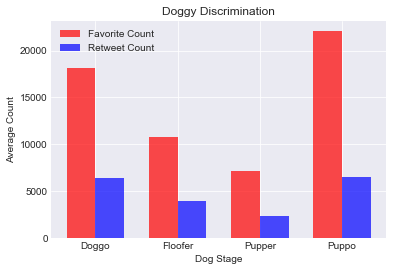

In [156]:
# Visualizing my favorite insight - Doggy Discrimination
# matplotlib docs on grouped bar chart: https://matplotlib.org/gallery/units/bar_unit_demo.html

# figure set up
N = 4
fig, ax = plt.subplots()
ind = np.arange(N)       # the x locations for the groups
width = 0.35             # the width of the bars

# get data
favorite_data = twitter_data_filtered.groupby('dog_stage')['favorite_count'].mean()
retweet_data = twitter_data_filtered.groupby('dog_stage')['retweet_count'].mean()

# create plot objects
p1 = ax.bar(ind, favorite_data, width, color='r', alpha=0.7)
p2 = ax.bar(ind + width, retweet_data, width, color='b', alpha=0.7)

# configure plot with clean labeling
ax.set_title('Doggy Discrimination')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Doggo', 'Floofer', 'Pupper', 'Puppo'))

ax.legend((p1[0], p2[0]), ('Favorite Count', 'Retweet Count'))
ax.autoscale_view()
ax.set_ylabel("Average Count")
ax.set_xlabel("Dog Stage")

plt.show()